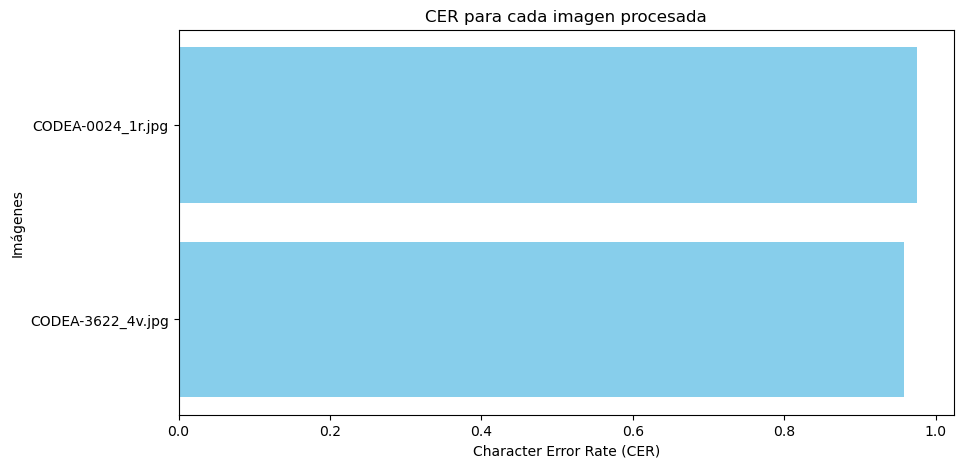

In [6]:
# Character Error Rate

import json
import os
import matplotlib.pyplot as plt
import Levenshtein

# Definir rutas de archivos y carpetas
model_output_path = "model_output/output.json"
documents_folder = "filtered_documents"

def load_json(file_path):
    """Carga un archivo JSON y lo devuelve como un diccionario o lista."""
    with open(file_path, "r", encoding="utf-8") as f:
        return json.load(f)

def compute_cer(reference, hypothesis):
    """Calcula el Character Error Rate (CER) usando la distancia de Levenshtein."""
    return Levenshtein.distance(reference, hypothesis) / max(1, len(reference))

def get_reference_text(image_name):
    """Obtiene el texto crítico correspondiente a una imagen a partir de los JSON en filtered_documents."""
    doc_id = image_name.split("_")[0]  # Extraer el ID del documento
    doc_path = os.path.join(documents_folder, f"{doc_id}.json")
    
    if not os.path.exists(doc_path):
        print(f"Advertencia: No se encontró el JSON para {image_name}")
        return None
    
    document_data = load_json(doc_path)
    
    for page in document_data:
        if page["local_image_path"].endswith(image_name):
            return page["critical_text"]
    
    print(f"Advertencia: No se encontró el texto de referencia para {image_name}")
    return None

def main():
    # Cargar el output del modelo
    model_output = load_json(model_output_path)
    
    cer_results = {}
    
    for image_name, ocr_text in model_output.items():
        reference_text = get_reference_text(image_name)
        
        if reference_text:
            cer = compute_cer(reference_text, ocr_text)
            cer_results[image_name] = cer
    
    # Visualizar resultados
    if cer_results:
        plt.figure(figsize=(10, 5))
        plt.barh(list(cer_results.keys()), list(cer_results.values()), color='skyblue')
        plt.xlabel("Character Error Rate (CER)")
        plt.ylabel("Imágenes")
        plt.title("CER para cada imagen procesada")
        plt.gca().invert_yaxis()
        plt.show()
    else:
        print("No se calcularon métricas de caracteres.")

if __name__ == "__main__":
    main()


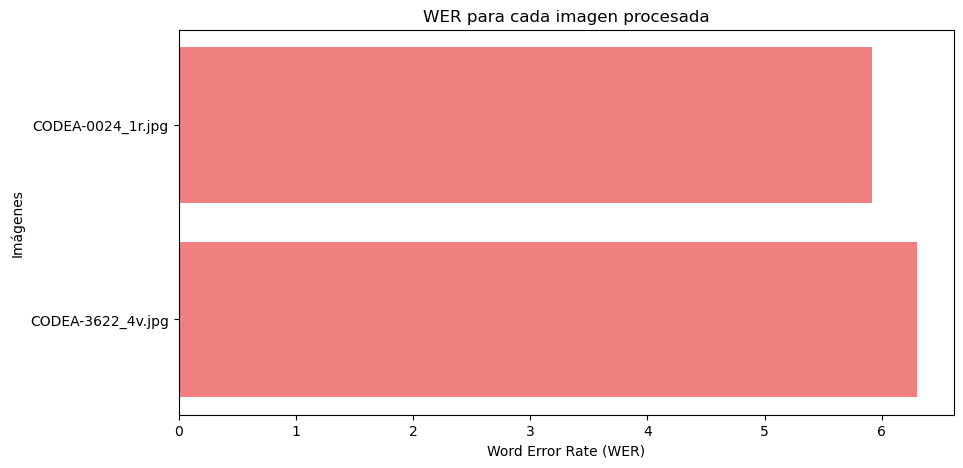

In [5]:
# Word Error Rate

import json
import os
import matplotlib.pyplot as plt
import Levenshtein

def load_json(file_path):
    """Carga un archivo JSON y lo devuelve como un diccionario o lista."""
    with open(file_path, "r", encoding="utf-8") as f:
        return json.load(f)

def compute_wer(reference, hypothesis):
    """Calcula el Word Error Rate (WER) usando la distancia de Levenshtein."""
    ref_words = reference.split()
    hyp_words = hypothesis.split()
    return Levenshtein.distance(" ".join(ref_words), " ".join(hyp_words)) / max(1, len(ref_words))

def get_reference_text(image_name, documents_folder):
    """Obtiene el texto crítico correspondiente a una imagen a partir de los JSON en filtered_documents."""
    doc_id = image_name.split("_")[0]  # Extraer el ID del documento
    doc_path = os.path.join(documents_folder, f"{doc_id}.json")
    
    if not os.path.exists(doc_path):
        print(f"Advertencia: No se encontró el JSON para {image_name}")
        return None
    
    document_data = load_json(doc_path)
    
    for page in document_data:
        if page["local_image_path"].endswith(image_name):
            return page["critical_text"]
    
    print(f"Advertencia: No se encontró el texto de referencia para {image_name}")
    return None

def main():
    model_output_path = "model_output/output.json"
    documents_folder = "filtered_documents"
    
    # Cargar el output del modelo
    model_output = load_json(model_output_path)
    
    wer_results = {}
    
    for image_name, ocr_text in model_output.items():
        reference_text = get_reference_text(image_name, documents_folder)
        
        if reference_text:
            wer = compute_wer(reference_text, ocr_text)
            wer_results[image_name] = wer
    
    # Visualizar resultados
    if wer_results:
        plt.figure(figsize=(10, 5))
        plt.barh(list(wer_results.keys()), list(wer_results.values()), color='lightcoral')
        plt.xlabel("Word Error Rate (WER)")
        plt.ylabel("Imágenes")
        plt.title("WER para cada imagen procesada")
        plt.gca().invert_yaxis()
        plt.show()
    else:
        print("No se calcularon métricas de palabras.")

if __name__ == "__main__":
    main()
